# Evaluating the Performance of YOLOv8 Model in Classifying Fruits Across Diverse Imaging Conditions

# 1.0 Introduction

Machine and deep learning applications play a dominant role in the current scenario in the agriculture sector. To date, the classification of fruits using image features has attained the researcher’s attraction very much from the last few years. Deep convolutional nets have brought about breakthroughs in processing images, video, speech and audio, whereas recurrent nets have shone light on sequential data such as text and speech (LeCun,   Bengio and Hinton, 2019).

The YOLOv8 model, renowned for its real-time image processing capabilities and enhanced object detection and classification, is a pivotal focus of this assessment.  YOLO model processes images in real-time at 45 frames per second (Redmon et al., 2016). The newest YOLOv8 has improved architecture to enhance object detection and classification as it can effectively detect objects of varying sizes (Mudawi et al., 2023).

The primary objective is to evaluate and compare the accuracy, precision, and recall of the YOLOv8 model in classifying fruits across two distinct datasets. One dataset comprises images captured using a poor-quality camera, while the other consists of high-quality images obtained online. This comparative analysis aims to elucidate the impact of image quality on the model's performance, particularly in the context of fruit classification under diverse imaging conditions, including those prevalent in developing countries.

Xiao, Nguyen, and Yan (2023) highlighted the need to consider the impact of extreme environments on automatic fruit detection, despite the current model's accurate ability to locate and classify fruits. The potential effects of resource constraints such as using a poor camera in developing contries represent a research direction that must be explored. Hence the premise of this assesment.

We have created our own data set on which camparison for perfomance is made against another dataset that we have obtained online inorder to establish the results. The classes within the datasets are labeled based on fruit types, cultivars, and ripeness states, encompassing "Orange," "Tomato Cherry Red," "Banana," "Grape," "Onion White," "Onion Red," and "Plum."

Objectives
1.	Determine the robustness of the YOLOv8 model by assessing its ability to classify fruits accurately in low-quality images, such as those captured using a phone with a poor camera, to understand its practical utility in environments with limited resources including those in developing countries.
2.	Evaluate the resource efficiency of the YOLOv8 model, including its processing speed and parameter requirements, on both datasets to understand its suitability for deployment in resource-constrained settings.



# 2.0 Methods and Results

i. Data sourcing and description:

The YOLOv8 model is being tested on 2 different datasets inorder to dinguish its perfomamce results. The first dataset labelled Robo-FruitClassification is sourced from  https://universe.roboflow.com/hcm-luldd/traicay. This is regarded as a standard dataset with high quality pictures that were taken with high solution on which comparison is made to a second dataset labelled WB-FruitClassification which was taken using a low quality camera in poor lighting conditions. This second dataset was collected in a tedious process and the pictures were provided with class labels and then annotated by drawing bound boxes using https://www.cvat.ai/ and then both datasets were applauded to our Github account for public access. According to Huang et al. (2022), fruit detection essentially requires both classification and localization by providing the class labels and bounding box coordinates of the targets.

The datasets consists of 8 selected different kinds of fruits. Each folder is named after a fruit and the number of images in the train, test and val folders are the same for each particular fruit in both data sets so that perfomance results are not affected by differences in batch sizes. Based on the given image, we need to classify the fruit as one of the 8 categories.

ii. Let's make sure that we have access to GPU

In [1]:
# Using the `nvidia-smi` command to check GPU utilization and memory usage
!nvidia-smi

Wed Jan 17 22:08:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

iii. Data importation and setting working directories

In [2]:
# Clone the GitHub repository containing the data set
!git clone https://github.com/WilliamBanda/Techniques-in-Machine-Learning-and-Artificial-Intelligence.git

Cloning into 'Techniques-in-Machine-Learning-and-Artificial-Intelligence'...
remote: Enumerating objects: 1070, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 1070 (delta 6), reused 0 (delta 0), pack-reused 1037
Receiving objects: 100% (1070/1070), 308.53 MiB | 9.34 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (830/830), done.


In [3]:
# Set working directory for Robo_FruitClassification
Data_Dir1 = '/content/Techniques-in-Machine-Learning-and-Artificial-Intelligence/Data/Robo_FruitClassification'


In [4]:
#Set working directory for WB_FruitClassification
Data_Dir2 = '/content/Techniques-in-Machine-Learning-and-Artificial-Intelligence/Data/WB_FruitClassification'

Let's print the fruit map for our first working directory

In [5]:
import os  # Import the os module to work with file and directory paths

Name = []  # Create an empty list to store the file names

# Iterate through the files in the specified directory and append their names to the list
for file in os.listdir('/content/Techniques-in-Machine-Learning-and-Artificial-Intelligence/Data/Robo_FruitClassification/train'):
    Name.append(file)

# Create a dictionary mapping the file names to unique numerical identifiers using the zip function
fruit_map = dict(zip(Name, [t for t in range(len(Name))]))

# Print the resulting dictionary
print(fruit_map)

{'Banana': 0, 'Plum': 1, 'Onion Red': 2, 'Onion White': 3, 'Orange': 4, 'Grape': 5, 'Tomato Cherry Red': 6}


iv. Install YOLOv8

In [6]:
# Pip install method

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/166.8 GB disk)


In [17]:
# Importing required libraries for YOLO and image display
from ultralytics import YOLO

from IPython.display import display, Image

v. Training the first model

a. Let's train the first model using the Robo_FruitClassification Dataset (Our Standard data set).

In [8]:
# Training a YOLO model using the `!yolo` command
!yolo task=classify mode=train model=yolov8n-cls.pt data={Data_Dir1} epochs=50 imgsz=295

100% 5.30M/5.30M [00:00<00:00, 94.9MB/s]
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/Techniques-in-Machine-Learning-and-Artificial-Intelligence/Data/Robo_FruitClassification, epochs=50, time=None, patience=50, batch=16, imgsz=295, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show

v (b) . Let's validate the best model that we have trained i.e model with highest accuracy.

In [9]:
# Validating a YOLO model using the `!yolo` command
!yolo task=classify mode=val model=/content/runs/classify/train/weights/best.pt data={Data_Dir1}


Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1443847 parameters, 0 gradients, 3.3 GFLOPs
train: /content/Techniques-in-Machine-Learning-and-Artificial-Intelligence/Data/Robo_FruitClassification/train... found 295 images in 7 classes ✅ 
val: /content/Techniques-in-Machine-Learning-and-Artificial-Intelligence/Data/Robo_FruitClassification/val... found 73 images in 7 classes ✅ 
test: /content/Techniques-in-Machine-Learning-and-Artificial-Intelligence/Data/Robo_FruitClassification/test... found 41 images in 7 classes ✅ 
val: Scanning /content/Techniques-in-Machine-Learning-and-Artificial-Intelligence/Data/Robo_FruitClassification/val... 73 images, 0 corrupt: 100% 73/73 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100% 5/5 [00:01<00:00,  2.87it/s]
                   all          1          1
Speed: 1.0ms preprocess, 10.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to run

v (c). Let's test model

In [10]:
# Predicting the classification of images using the YOLO model with specified configuration and confidence threshold
!yolo task=classify mode=predict model=/content/runs/classify/train/weights/best.pt conf=0.25 source={Data_Dir1}/test/Banana

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1443847 parameters, 0 gradients, 3.3 GFLOPs

image 1/5 /content/Techniques-in-Machine-Learning-and-Artificial-Intelligence/Data/Robo_FruitClassification/test/Banana/23_100_jpg.rf.b3bb4bd18497e59c104278c95c54e4b8.jpg: 320x320 Banana 0.37, Tomato Cherry Red 0.36, Onion White 0.14, Onion Red 0.07, Grape 0.05, 3.9ms
image 2/5 /content/Techniques-in-Machine-Learning-and-Artificial-Intelligence/Data/Robo_FruitClassification/test/Banana/316_100_jpg.rf.22ef033a9c9d3df60b6f27fdb21bc55d.jpg: 320x320 Onion White 0.35, Banana 0.33, Tomato Cherry Red 0.15, Onion Red 0.10, Grape 0.06, 2.9ms
image 3/5 /content/Techniques-in-Machine-Learning-and-Artificial-Intelligence/Data/Robo_FruitClassification/test/Banana/31_100_jpg.rf.8f35c5ca06abfb415874a8d5901a0f16.jpg: 320x320 Banana 0.27, Onion White 0.26, Tomato Cherry Red 0.23, Onion Red 0.13, Grape 0.08, 2.7ms
image 4/5 /content/Te

Let's display the first image to test the model

In [11]:
# Load the trained YOLOv8 model
model = YOLO("/content/runs/classify/train/weights/best.pt")

# Predict an image and save the output
results = model.predict(source="/content/runs/classify/predict/31_100_jpg.rf.8f35c5ca06abfb415874a8d5901a0f16.jpg", save=True, project="Identified_Image", name="Fruit")


image 1/1 /content/runs/classify/predict/31_100_jpg.rf.8f35c5ca06abfb415874a8d5901a0f16.jpg: 320x320 Banana 0.27, Onion White 0.27, Tomato Cherry Red 0.22, Onion Red 0.13, Grape 0.08, 4.3ms
Speed: 14.7ms preprocess, 4.3ms inference, 0.1ms postprocess per image at shape (1, 3, 320, 320)
Results saved to Identified_Image/Fruit


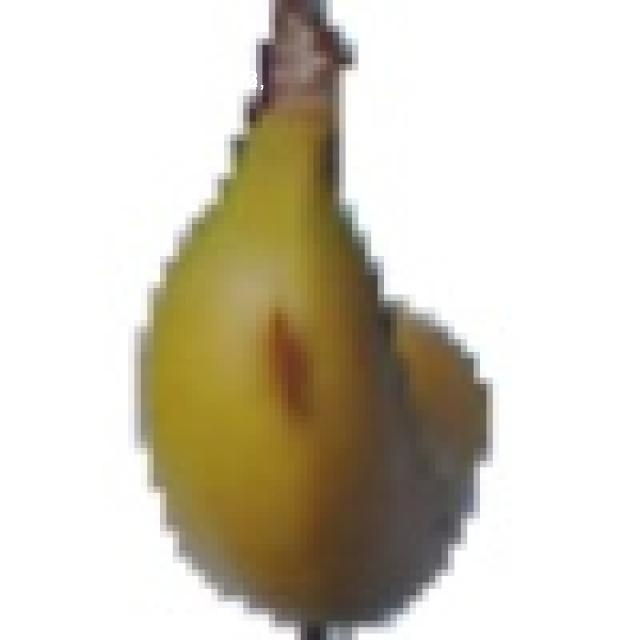

In [12]:
# Displaying the image in the specified directory
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/Identified_Image/Fruit/31_100_jpg.rf.8f35c5ca06abfb415874a8d5901a0f16.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")

v (d) Let's explore the outcome metrics and results

In [13]:
# Using the `ls` command to list files and directories in a specific directory
!ls -la '/content/runs/classify/train'

total 2168
drwxr-xr-x 3 root root   4096 Jan 17 22:15 .
drwxr-xr-x 5 root root   4096 Jan 17 22:16 ..
-rw-r--r-- 1 root root   1609 Jan 17 22:10 args.yaml
-rw-r--r-- 1 root root 154943 Jan 17 22:15 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 139832 Jan 17 22:15 confusion_matrix.png
-rw-r--r-- 1 root root 157152 Jan 17 22:15 events.out.tfevents.1705529463.ff0e930434af.1383.0
-rw-r--r-- 1 root root   9792 Jan 17 22:15 results.csv
-rw-r--r-- 1 root root 100399 Jan 17 22:15 results.png
-rw-r--r-- 1 root root 140479 Jan 17 22:11 train_batch0.jpg
-rw-r--r-- 1 root root 156888 Jan 17 22:11 train_batch1.jpg
-rw-r--r-- 1 root root 136946 Jan 17 22:11 train_batch2.jpg
-rw-r--r-- 1 root root 146517 Jan 17 22:14 train_batch760.jpg
-rw-r--r-- 1 root root 165532 Jan 17 22:14 train_batch761.jpg
-rw-r--r-- 1 root root 149063 Jan 17 22:14 train_batch762.jpg
-rw-r--r-- 1 root root 138681 Jan 17 22:15 val_batch0_labels.jpg
-rw-r--r-- 1 root root 138681 Jan 17 22:15 val_batch0_pred.jpg
-rw-r--r

Let's display results table.

In [14]:
# Display the first 10 lines of the results.csv to inspect the initial contents of the file
!cat /content/runs/classify/train/results.csv | head -10

                  epoch,             train/loss,  metrics/accuracy_top1,  metrics/accuracy_top5,               val/loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      1,                 1.7945,                0.58904,                0.93151,                 1.8626,             0.00012852,             0.00012852,             0.00012852
                      2,                 1.3028,                0.89041,                      1,                 1.7113,             0.00025895,             0.00025895,             0.00025895
                      3,                0.78995,                0.94521,                      1,                 1.3802,             0.00038401,             0.00038401,             0.00038401
                      4,                0.38545,                 0.9589,                      1,                 1.2399,             0.00050369,             0.00050369,             0.00050369
                      5,                

Graphing the results for perfomance analysis

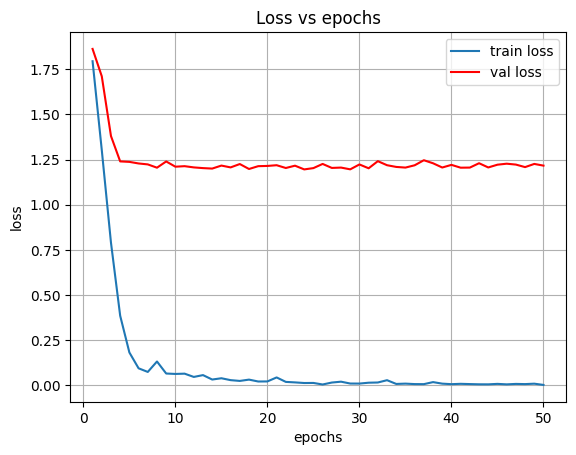

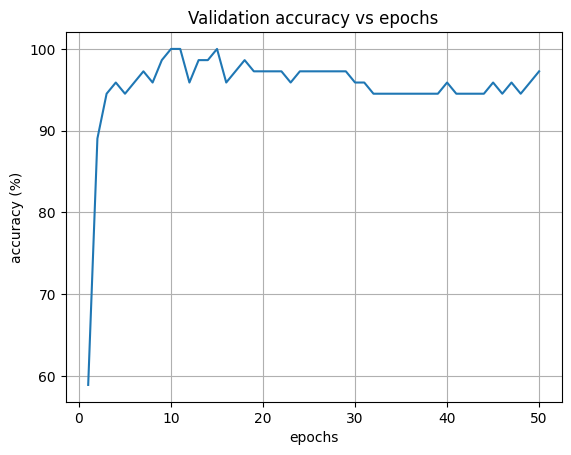

In [15]:
# Import the os module for interacting with the operating system
import os

# Import the pandas library and alias it as pd for data manipulation and analysis
import pandas as pd

# Import the pyplot submodule from the matplotlib library and alias it as plt for data visualization
import matplotlib.pyplot as plt
# Plotting the results for analysis
results_path = '/content/runs/classify/train/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

We can decide whether the model we have trained is good or not based the plot results above. The loss vs epochs plot shows that in both cases train loss and val loss is going down which is exactly what we expected. On the other hand we can see that validation accuracy goes up when we increase the number of epochs but after the 10th epoch we are not gaining or losing much acuracy we are forming something like a plateau which indicates a health training process.

vi. Let's train Our second model

a. Let's use YOLOv8 to train the model on the WB_FruitClassification dataset i.e Data set curated using a low quality camera and poor lighting.

In [16]:
# Training a YOLO model using the `!yolo` command
!yolo task=classify mode=train model=yolov8n-cls.pt data={Data_Dir2} epochs=50 imgsz=295

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/Techniques-in-Machine-Learning-and-Artificial-Intelligence/Data/WB_FruitClassification, epochs=50, time=None, patience=50, batch=16, imgsz=295, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False,

vi (b). Let's validate the best model i.e model with highest accuracy for our second data set.

In [18]:
# Validating a YOLO model using the `!yolo` command
!yolo task=classify mode=val model=/content/runs/classify/train2/weights/best.pt data={Data_Dir2}

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1443847 parameters, 0 gradients, 3.3 GFLOPs
train: /content/Techniques-in-Machine-Learning-and-Artificial-Intelligence/Data/WB_FruitClassification/train... found 285 images in 7 classes ✅ 
val: /content/Techniques-in-Machine-Learning-and-Artificial-Intelligence/Data/WB_FruitClassification/val... found 70 images in 7 classes ✅ 
test: /content/Techniques-in-Machine-Learning-and-Artificial-Intelligence/Data/WB_FruitClassification/test... found 41 images in 7 classes ✅ 
val: Scanning /content/Techniques-in-Machine-Learning-and-Artificial-Intelligence/Data/WB_FruitClassification/val... 70 images, 0 corrupt: 100% 70/70 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100% 5/5 [00:15<00:00,  3.18s/it]
                   all      0.414      0.914
Speed: 0.6ms preprocess, 3.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classif

vi (c). Let's test the model

In [19]:
# Predicting the classification of images using the YOLO model with specified configuration and confidence threshold
!yolo task=classify mode=predict model=/content/runs/classify/train2/weights/best.pt conf=0.25 source={Data_Dir2}/test/Banana

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1443847 parameters, 0 gradients, 3.3 GFLOPs

image 1/5 /content/Techniques-in-Machine-Learning-and-Artificial-Intelligence/Data/WB_FruitClassification/test/Banana/IMG_7392.jpg: 320x320 Banana 1.00, Onion White 0.00, Grape 0.00, Red Onion 0.00, Orange 0.00, 3.0ms
image 2/5 /content/Techniques-in-Machine-Learning-and-Artificial-Intelligence/Data/WB_FruitClassification/test/Banana/IMG_7393 - Copy (2).jpg: 320x320 Banana 1.00, Onion White 0.00, Orange 0.00, Grape 0.00, Tomato Cherry Red 0.00, 4.8ms
image 3/5 /content/Techniques-in-Machine-Learning-and-Artificial-Intelligence/Data/WB_FruitClassification/test/Banana/IMG_7393 - Copy - Copy.jpg: 320x320 Banana 1.00, Onion White 0.00, Orange 0.00, Grape 0.00, Tomato Cherry Red 0.00, 3.1ms
image 4/5 /content/Techniques-in-Machine-Learning-and-Artificial-Intelligence/Data/WB_FruitClassification/test/Banana/IMG_7394 - Copy 

Let's display the image to test the model

In [20]:
# Load the trained YOLOv8 model
model = YOLO("/content/runs/classify/train2/weights/best.pt")

# Predict an image and save the output
results = model.predict(source="/content/runs/classify/predict2/IMG_7392.jpg", save=True, project="Identified_Image2", name="Fruit2")


image 1/1 /content/runs/classify/predict2/IMG_7392.jpg: 320x320 Banana 1.00, Onion White 0.00, Grape 0.00, Red Onion 0.00, Orange 0.00, 3.0ms
Speed: 108.3ms preprocess, 3.0ms inference, 0.1ms postprocess per image at shape (1, 3, 320, 320)
Results saved to Identified_Image2/Fruit2


In [22]:
# Displaying the first three images in the specified directory

for image_path in glob.glob(f'/content/Identified_Image2/Fruit2/IMG_7392.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

Output hidden; open in https://colab.research.google.com to view.

vi (d). Let's explore the outcome metrics

In [23]:
# Using the `ls` command to list files and directories in a specific directory
!ls -la '/content/runs/classify/train2'

total 2120
drwxr-xr-x 3 root root   4096 Jan 17 23:18 .
drwxr-xr-x 8 root root   4096 Jan 17 23:22 ..
-rw-r--r-- 1 root root   1609 Jan 17 22:16 args.yaml
-rw-r--r-- 1 root root 161145 Jan 17 23:18 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 141896 Jan 17 23:18 confusion_matrix.png
-rw-r--r-- 1 root root 157152 Jan 17 23:18 events.out.tfevents.1705529816.ff0e930434af.3067.0
-rw-r--r-- 1 root root   9792 Jan 17 23:17 results.csv
-rw-r--r-- 1 root root 140574 Jan 17 23:18 results.png
-rw-r--r-- 1 root root 133286 Jan 17 22:17 train_batch0.jpg
-rw-r--r-- 1 root root 147905 Jan 17 22:17 train_batch1.jpg
-rw-r--r-- 1 root root 156567 Jan 17 22:17 train_batch2.jpg
-rw-r--r-- 1 root root 175174 Jan 17 23:06 train_batch720.jpg
-rw-r--r-- 1 root root 155323 Jan 17 23:06 train_batch721.jpg
-rw-r--r-- 1 root root 163848 Jan 17 23:06 train_batch722.jpg
-rw-r--r-- 1 root root 118293 Jan 17 23:17 val_batch0_labels.jpg
-rw-r--r-- 1 root root 119483 Jan 17 23:17 val_batch0_pred.jpg
-rw-r--r

Let's display the results table

In [25]:
!cat /content/runs/classify/train2/results.csv | head -10

                  epoch,             train/loss,  metrics/accuracy_top1,  metrics/accuracy_top5,               val/loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      1,                 1.8213,                0.15714,                0.72857,                 1.9167,             0.00012138,             0.00012138,             0.00012138
                      2,                 1.4755,                0.25714,                0.84286,                 1.8197,             0.00024495,             0.00024495,             0.00024495
                      3,                 1.0122,                    0.3,                0.94286,                 1.8636,             0.00036343,             0.00036343,             0.00036343
                      4,                0.59736,                0.41429,                0.92857,                 1.7353,             0.00047683,             0.00047683,             0.00047683
                      5,                

Graphing the results for perfomance analysis

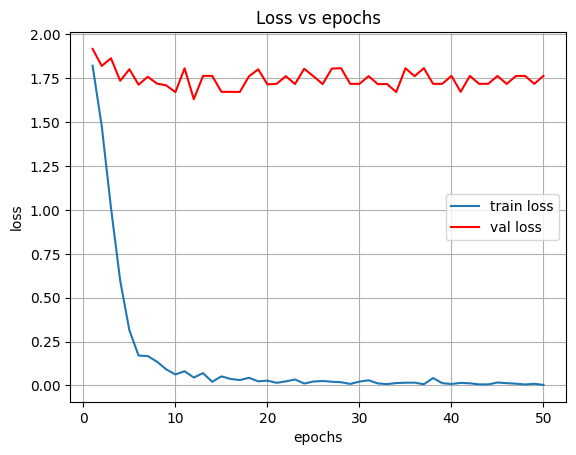

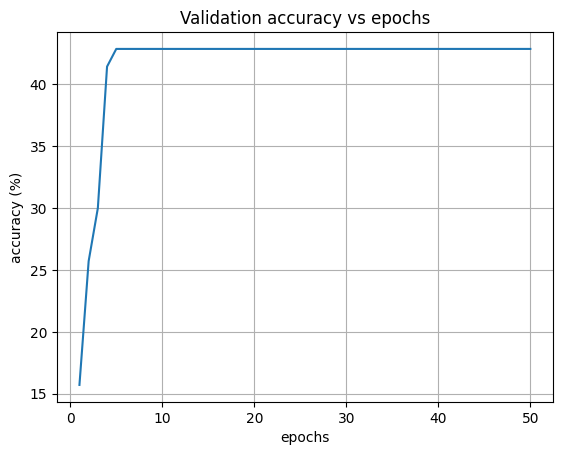

In [26]:
# Plotting the results for analysis
results_path = '/content/runs/classify/train2/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

Contrary to the results for our first model here the loss vs epochs plot shows that train loss is going down while the val loss is kind of not reducing that much rather it stays almost on similar values which indicates some kind of inconsistencies in the acuracy of our model. On the other hand we can see that validation accuracy goes up when we increase the number of epochs but after the 20th epoch we are not gaining or losing much acuracy we are forming something like a plateau which indicates a fairly health training process.

# 3.0 Discussion

The performance of the YOLOv8 model on the Robo-FruitClassification and WB-FruitClassification datasets reveals significant insights into its robustness and efficiency. The model demonstrates exceptional performance on the Robo-FruitClassification dataset, achieving a perfect accuracy (mAP) of 100%. Xiao, Nguyen, and Yan (2023) observed that YOLOv8 can achieve an accuracy rate of more than 90%, which is consistent with our own findings.  This dataset, characterized by high-quality images, allows the model to fully leverage its capabilities, resulting in optimal performance. The model's computational complexity, as indicated by the number of parameters (1,443,847) and FLOPs (3.3 GFLOPs), remains consistent across both datasets, demonstrating its stability. Furthermore, the model exhibits impressive efficiency, completing 50 epochs in just 0.073 hours and maintaining a swift inference speed of 0.6 ms.

In contrast, the performance of the YOLOv8 model on the WB-FruitClassification dataset, characterized by low-quality images taken in poor lighting conditions, is notably lower, with an accuracy (mAP) of 42%. This significant drop in accuracy underscores the challenges posed by low-quality images in object detection tasks. Despite these challenges, the model's computational complexity and inference speed remain consistent with those observed in the Robo-FruitClassification dataset. However, the model takes considerably longer to train on the WB-FruitClassification dataset, completing 50 epochs in 0.967 hours, which is over 12 times longer than the training time on the Robo-FruitClassification dataset.



# 4.0 Conclusion
In conclusion, the YOLOv8 model demonstrates remarkable robustness and efficiency when trained on high-quality images, achieving perfect accuracy and fast training times. However, its performance drops significantly when faced with low-quality images, indicating a potential area for improvement. Despite this, the model's consistent computational complexity and inference speed across both datasets highlight its stability and potential for real-time applications, even in challenging conditions.



# 5.0 References

LeCun, Y., Bengio, Y., Hinton, G., 2015. Deep learning. Nature 521, 436–444. https://doi.org/10.1038/nature14539

Mudawi, A. et al. (2019). Vehicle Detection and Classification via YOLOv8 and Deep Belief Network over Aerial Image Sequences. Sustainability 2023, 15(19), 14597. https://doi.org/10.3390/su151914597

Redmon, J., Divvala, S., Girshick, R., Farhadi, A., 2016. You Only Look Once: Unified, Real-Time Object Detection, in: 2016 IEEE Conference on Computer Vision and Pattern Recognition (CVPR). Presented at the 2016 IEEE Conference on Computer Vision and Pattern Recognition (CVPR), IEEE, Las Vegas, NV, USA, pp. 779–788. https://doi.org/10.1109/CVPR.2016.91

Xiao, B., Nguyen, M. & Yan, W.Q. Fruit ripeness identification using YOLOv8 model. Multimed Tools Appl (2023). https://doi.org/10.1007/s11042-023-16570-9

Huang, H., Huang, T., Li, Z., Lyu, S., and Hong, T. (2022). Design of citrus fruit detection system based on mobile platform and edge computer device. Sensors 22:59. doi: https://doi.org/10.3390/s22010059

